 
 ## <font color="1497d4">  **Statistical Analysis for Accented Speech recognition**</font>

 
 
<font color=white> **Mozilla Common Voice 10.0. dataset**</font> 

## <font color="1497d4">  **Analyze results from Carlos’ model**</font>
 
<font color=white> **Setup dev environment:**</font> 


 


###<font color="1497d4"> Import the necessary python libraries:</font>


The next step is to import the required python libraries:
*   NumPy:   for scientific computing.
*   Matplotlib: a plotting library for Python.
*   Matplotlib.pyplot:  a group of functions that allow matplotlib to work like MATLAB.
*   Pandas: used for data science/data analysis.







In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import math Library   -- # Check whether some values are NaN
import math

###<font color="1497d4"> Importing the Dataset:</font>


The next step is to import the dataset file by either uploading the file on Google Colab or mounting the google drive and empowering Colab to access all files(dataset)on it. Then to copy the dataset to our colab runtime files.

In [2]:
#Mount drive


In [3]:
# Import the dataset file by method1 
# from google.colab import files
# uploaded = files.upload()

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/results.json   /content/results.json

# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt

# copy the expermintations files from Mozilla Commen Voice v 10 to deal with them

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv


###<font color="1497d4"> Reading the Dataset:</font>
**The following Method takes the dataset filename and loads it into data frame called dataset.**




In [4]:
#read a TSV file/Dataset

import pandas as pd
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')
dataset_validated_tsv

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN
...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN


In [5]:
#Count non-NA cells for each column or row.

import pandas as pd
datasetcount= pd.read_json ('results.json')   
print("*************************************" )
print(datasetcount.count())
print("*************************************" )
s=pd.Series(datasetcount.any)
print(s.count())
datasetcount.drop(datasetcount[(datasetcount['test_at.txt'].isna())].index, inplace=True)
print("*************************************" )
print(datasetcount.count()) #Count non-NA cells for each column or row.
print("*************************************" )
s=pd.Series(datasetcount.any)
print("*************************************" )
print(s.count())
#***************************************

'''
delayed_flights = data[data['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier
'''

*************************************
test_at.txt        4495
test_gb.txt         148
test_it.txt         978
test_de_al.txt      724
test_fr.txt        1415
test_de_ni.txt      671
test_ch.txt        2908
test_de.txt       36504
test_us.txt         291
test_ca.txt         123
test_ru.txt         973
dtype: int64
*************************************
1
*************************************
test_at.txt       4495
test_gb.txt          0
test_it.txt          0
test_de_al.txt       0
test_fr.txt          0
test_de_ni.txt       0
test_ch.txt          0
test_de.txt          0
test_us.txt          0
test_ca.txt          0
test_ru.txt          0
dtype: int64
*************************************
*************************************
1


"\ndelayed_flights = data[data['delayed'] == True] #filter to only rows where delayer == True\ndelayed_flights['unique_carrier'].value_counts() #count the number of rows for each carrier\n"

In [6]:
# How do I replace NaN with 0 in Python?
# Replace NaN Values with Zeros in Pandas DataFrame

# (1) For a single column using Pandas: dataset_test_at['DataFrame Column'] = dataset_test_at['DataFrame Column'].fillna(0)
# (2) For a single column using NumPy: dataset_test_at['DataFrame Column'] = dataset_test_at['DataFrame Column'].replace(np.nan, 0)
# (3) For an entire DataFrame using Pandas: dataset_test_at.fillna(0)

#By default, dropna() will drop all rows in which any null value is present:
# dataset_test_at.dropna()
#***************************************************
# Operating on Null Values
# As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

# isnull(): generate a boolean mask indicating missing values
# notnull(): opposite of isnull()
# dropna(): return a filtered version of the data
# fillna(): return a copy of the data with missing values filled or imputed
# We will finish this section with a brief discussion and demonstration of these routines:
#*********************************************************


#https://www.oreilly.com/content/handling-missing-data/

###<font color="1497d4">The descriptive statistics and computational methods discussed in the data structure overview are all written to account for missing data. </font>
**For example:**
*   When countming data, NA (missing) values will be treated as zero.
*   If the data are all NA, the result will be 0.
*   Cumulative methods like cumcount() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#experimental-na-scalar-to-denote-missing-values

In [7]:
# # covert the NaN Values to 0
# import pandas as pd
# dataset_results_json= pd.read_json ('results.json')   
# dataset_results_json = dataset_results_json.fillna('0') # replace missing values with '' 
# pd.options.mode.use_inf_as_na = True
# #dataset.plot()
# #sns.displot(dataset_results_json,y="test_at.txt",x="test_gp.txt")
# dataset_results_json

###<font color="1497d4"> Cleaning our dataset</font>

We have 49230  rows in our dataset. Consequently, we will delete the rows which do not meet the conditions (Values range). otherwise it changed normaly with the mean of the field in the small dataset.
After deleting the rows which have missing data. We relize that the new number 4495 rows. 

In [8]:
 
# Check the initial shape of the DataFrame
# Delete rows where case numbers are NaN
# This deletion is completed by "selecting" rows where case numbers are not zero
# (dataset['test_at.txt'].isna())|

#dataset.drop(dataset[(dataset['test_gb.txt'].isna())|(dataset['test_it.txt'].isna())|(dataset['test_de_al.txt'] .isna())|(dataset['test_fr.txt'].isna())|(dataset['test_de_ni.txt'] .isna())|(dataset['test_ch.txt'].isna())|(dataset['test_de.txt'].isna())|(dataset['test_us.txt'].isna())|(dataset['test_ca.txt'].isna())|(dataset['test_ru.txt'].isna())].index, inplace=True)

#dataset.drop(dataset[(dataset['test_gb.txt'].isna())|(dataset['test_it.txt'].isna())|(dataset['test_de_al.txt'] .isna())|(dataset['test_fr.txt'].isna())|(dataset['test_de_ni.txt'] .isna())|(dataset['test_ch.txt'].isna())|(dataset['test_de.txt'].isna())|(dataset['test_us.txt'].isna())|(dataset['test_ca.txt'].isna())|(dataset['test_ru.txt'].isna())].index, inplace=True)
dataset_at= pd.read_json ('results.json')   
dataset_at.drop(dataset_at[(dataset_at['test_at.txt'].isna())].index, inplace=True)
# print(" **************************************************")
# print("The dataset of test_at.txt Values"," **************************************************",dataset_at.head())
# print(" **************************************************")
# print("The dataset's Shape of test_at.txt",dataset_at.shape)
dataset_at.head()
dataset_at['test_at.txt']

/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3    {'reference': 'er ist nach eustache de saint p...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3    {'reference': 'eine erste kleinformatige vorst...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3    {'reference': 'er blieb ohne erfolg und lag in...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3    {'reference': 'mein garten ist teil eines klei...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3    {'reference': 'was habe ich damals für einen u...
                                                                                                                         ...                        
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23706817.mp3    {'refer

In [9]:
# delete the NaN Values from showing

dataset_results_json= pd.read_json ('results.json')   
dataset_results_json.drop(dataset_results_json[(dataset_results_json['test_at.txt'].isna())].index, inplace=True)
print(dataset_results_json["test_at.txt"])
print(" **************************************************")
print(dataset_results_json["test_at.txt"])

# print(dataset_at)

/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_31449916.mp3    {'reference': 'er ist nach eustache de saint p...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19730674.mp3    {'reference': 'eine erste kleinformatige vorst...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_19703888.mp3    {'reference': 'er blieb ohne erfolg und lag in...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_18507972.mp3    {'reference': 'mein garten ist teil eines klei...
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_24131267.mp3    {'reference': 'was habe ich damals für einen u...
                                                                                                                         ...                        
/ds/audio/CommonVoiceCorpus10.0/cv-corpus-10.0-2022-07-04/de/clips/common_voice_de_23706817.mp3    {'refer

###<font color="1497d4"> **You can find the test data, split by accent, in the data zip. The results are also within that zip file, named results.json. Here are some numbers and plots that we would like to have.**</font>

1.   **Duration distribution of audiofiles per speaker's accent, gender and age group, both as a plot and in terms of mean and variance.**
2.   **WER distribution per speaker's accent, gender, age group 
and duration, both as a plot and in terms of mean and variance.**
 


#### **Duration distribution of audiofiles per speaker's accent ,both as a plot and in terms of mean and variance.**

In [10]:
# read a TSV file/Dataset
# Duration distribution of audiofiles per speaker's accent

! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/cv-corpus04072022/de/validated.tsv /content/validated.tsv


#,y="speaker's accent",x="Duration distribution"
import pandas as pd
tsv_data = pd.read_csv('validated.tsv', sep='\t')
tsv_data.drop(tsv_data[(tsv_data['accents'].isna())].index, inplace=True)
tsv_data
print('*******************print Labels************************')

for label, content in tsv_data.items():
    print(f'label: {label}')
    #print(f'content: {content}', sep='\n')

print('*********************print Contents**********************')

for label, content in tsv_data.items():
    #print(f'label: {label}')
    print(f'content: {content}', sep='\n')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


*******************print Labels************************
label: client_id
label: path
label: sentence
label: up_votes
label: down_votes
label: age
label: gender
label: accents
label: locale
label: segment
*********************print Contents**********************
content: 6         03ac3eb87717f430b8a64228e61b5829cf6187f790c0fd...
21        0b8442069d5bdd1f2a891edc5cae7c92471e35742da54a...
26        0df96a055c391517acf584f64f74df3e5356de0c14a6c8...
45        1aabab5972b13f76cd0ae98088be9d79c3bfbb30fd60a3...
51        1e44e03d919c81cb3b1e8a1c5d494e864607631e690d83...
                                ...                        
793063    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793064    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793065    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793066    372293e65cdab88771e028a4351651ab2eff64438ddafc...
793067    372293e65cdab88771e028a4351651ab2eff64438ddafc...
Name: client_id, Length: 539234, dtype: object
content: 6         com

In [11]:

# read the TSV file/Dataset test_at.txt
# Duration distribution of audiofiles per speaker's accent
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'], sep='\t')
#dataset_test_at = pd.read_csv('test_at.txt')
print('*******************************************')
print(dataset_test_at)
print('*******************************************')
dataset_test_at.info()
print('*******************************************')
 

# Print the Dataset Columns (Labels) and Rows (contents)
for label, content in dataset_test_at.items():
    print(f'\n label: {label}')
    #print(f'content: {content}', sep='\n')

#dataset_test_at[' "duration": 4.9}'].index

#dataset_test_at.drop(dataset_test_at[(dataset_test_at['accents'].isna())].index, inplace=True)
# tsv_data.drop(tsv_data[(tsv_data['accents'].isna())].index, inplace=True)
# tsv_data

*******************************************
                                         audio_filepath  text  duration
0     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
1     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
2     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
3     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
...                                                 ...   ...       ...
4490  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4491  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4492  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4493  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN
4494  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   NaN       NaN

[4495 rows x 3 columns]
*******************************************
<class 'pandas.core.fra

In [12]:
dataset_test_at.drop(dataset_test_at[(dataset_test_at['duration'].isna())].index, inplace=True)
#[*dataset_test_at]
dataset_test_at.keys()

Index(['audio_filepath', 'text', 'duration'], dtype='object')

In [13]:
#,y="speaker's accent",x="Duration distribution"
dataset_test_at.drop(dataset_test_at[(dataset_test_at['duration'].isna())].index, inplace=True)
dataset_test_at


,audio_filepath,text,duration


In [14]:
#,y="speaker's accent",x="Duration distribution"
import re # import the library of research about special value in String 
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])
'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''
# extract the numeric values of the durations from the third Column and store it in a new column called
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the numeric values of the durations from the third Column and store it in a new column called 
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[103:111]

###dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
dataset_test_at


,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267
...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312


#### **Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.**

In [15]:
dataset_test_at.mean(0)
################################## Accent AT ###########################################
print('################################## Accent AT ###########################################')


################################## Accent AT ###########################################


<ipython-input-15-65bb03f13144>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_test_at.mean(0)


In [16]:
# copy the expermintations files to deal with them
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_at.txt /content/test_at.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ca.txt /content/test_ca.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ch.txt /content/test_ch.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_al.txt /content/test_de_al.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de_ni.txt /content/test_de_ni.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_de.txt /content/test_de.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_fr.txt /content/test_fr.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_gb.txt /content/test_gb.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_it.txt /content/test_it.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_ru.txt /content/test_ru.txt
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/data/test_us.txt /content/test_us.txt


In [17]:
# Duration distribution of audiofiles per speaker's accent AT,CA, CH, DE_AL, DE_ni, DE, FR, GB, IT, RU, US. both as a plot and in terms of mean and variance.
import re # import the library of research about special value in String 
################################## Accent AT ###########################################
print('################################## Accent AT ###########################################')
# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])

'''
df['Numbers Only'] = df['Numbers and Text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
'''

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_at['duration_numeric'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration_numeric'] =dataset_test_at['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]

##dataset_test_at['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_at)
################################### Accent CA ##########################################
print('################################## Accent CA ###########################################')
dataset_test_ca = pd.read_csv('test_ca.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ca['duration_numeric'] = dataset_test_ca['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ca['duration_numeric'] =dataset_test_ca['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ca['audio_filepath_numeric'] = dataset_test_ca['audio_filepath'].str[-13:-5]

print(dataset_test_ca)
##################################### Accent CH ########################################
print('################################## Accent CH ###########################################')
dataset_test_ch = pd.read_csv('test_ch.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ch['duration_numeric'] = dataset_test_ch['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ch['duration_numeric'] =dataset_test_ch['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ch['audio_filepath_numeric'] = dataset_test_ch['audio_filepath'].str[-13:-5]

print(dataset_test_ch)
##################################### Accent DE_AL ########################################
print('################################## Accent DE_AL ###########################################')
dataset_test_de_al = pd.read_csv('test_de_al.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_al['duration_numeric'] = dataset_test_de_al['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_al['duration_numeric'] =dataset_test_de_al['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_al['audio_filepath_numeric'] = dataset_test_de_al['audio_filepath'].str[-13:-5]

print(dataset_test_de_al)
##################################### Accent DE_NI ########################################
print('################################## Accent DE_NI ###########################################')
dataset_test_de_ni = pd.read_csv('test_de_ni.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de_ni['duration_numeric'] = dataset_test_de_ni['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de_ni['duration_numeric'] =dataset_test_de_ni['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de_ni['audio_filepath_numeric'] = dataset_test_de_ni['audio_filepath'].str[-13:-5]

###dataset_test_de_ni['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de_ni)
##################################### Accent DE ########################################
print('################################## Accent DE ###########################################')
dataset_test_de = pd.read_csv('test_de.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_de['duration_numeric'] = dataset_test_de['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_de['duration_numeric'] =dataset_test_de['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_de['audio_filepath_numeric'] = dataset_test_de['audio_filepath'].str[-13:-5]

###dataset_test_de['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_de)
##################################### Accent FR ########################################
print('################################## Accent FR ###########################################')
dataset_test_fr = pd.read_csv('test_fr.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_fr['duration_numeric'] = dataset_test_fr['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_fr['duration_numeric'] =dataset_test_fr['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_fr['audio_filepath_numeric'] = dataset_test_fr['audio_filepath'].str[-13:-5]

###dataset_test_fr['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_fr)
##################################### Accent GB ########################################
print('################################## Accent GB ###########################################')
dataset_test_gb = pd.read_csv('test_gb.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_gb['duration_numeric'] = dataset_test_gb['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_gb['duration_numeric'] =dataset_test_gb['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_gb['audio_filepath_numeric'] = dataset_test_gb['audio_filepath'].str[-13:-5]

###dataset_test_gb['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_gb)
##################################### Accent IT ########################################
print('################################## Accent IT ###########################################')
dataset_test_it = pd.read_csv('test_it.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_it['duration_numeric'] = dataset_test_it['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_it['duration_numeric'] =dataset_test_it['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_it['audio_filepath_numeric'] = dataset_test_it['audio_filepath'].str[-13:-5]

###dataset_test_it['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_it)
##################################### Accent RU ########################################
print('################################## Accent RU ###########################################')
dataset_test_ru = pd.read_csv('test_ru.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_ru['duration_numeric'] = dataset_test_ru['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_ru['duration_numeric'] =dataset_test_ru['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_ru['audio_filepath_numeric'] = dataset_test_ru['audio_filepath'].str[-13:-5]

###dataset_test_ru['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_ru)
##################################### Accent US ########################################
print('################################## Accent US ###########################################')
dataset_test_us = pd.read_csv('test_us.txt', header=None, names=['audio_filepath','text','duration'])

# extract the numeric values of the durations from the third Column and store it in a new column called duration_numeric
dataset_test_us['duration_numeric'] = dataset_test_us['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_us['duration_numeric'] =dataset_test_us['duration_numeric'].div(10)
# extract the audio files ID values from the first Column and store it in a new column called audio_filepath_numeric
#dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

dataset_test_us['audio_filepath_numeric'] = dataset_test_us['audio_filepath'].str[-13:-5]

###dataset_test_us['audio_filepath_numeric']=re.search('AAA(.+?)ZZZ', text)
print(dataset_test_us)

##################################### Accent Mean ########################################

print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_name="dataset_test_"

for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  #print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
  
  Accent_type=dataset_name+Accent_Values
  print(f'{Accent_type}_mean =',Accent_type)
print('################################## Accent Mean ###########################################')

print(np.mean(dataset_test_at['duration_numeric']))
print(np.mean(dataset_test_ca['duration_numeric']))
print(np.mean(dataset_test_ch['duration_numeric']))
print(np.mean(dataset_test_de_al['duration_numeric']))
print(np.mean(dataset_test_de_ni['duration_numeric']))
print(np.mean(dataset_test_de['duration_numeric']))
print(np.mean(dataset_test_fr['duration_numeric']))
print(np.mean(dataset_test_gb['duration_numeric']))
print(np.mean(dataset_test_it['duration_numeric']))
print(np.mean(dataset_test_ru['duration_numeric']))
print(np.mean(dataset_test_us['duration_numeric']))

# for i in range(1,12):
#   dataset_accent_all=[i]
#   print(i)

################################## Accent AT ###########################################
                                         audio_filepath  \
0     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
1     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
2     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
3     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4     {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
...                                                 ...   
4490  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4491  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4492  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4493  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   
4494  {"audio_filepath": "/ds/audio/CommonVoiceCorpu...   

                                                   text            duration  \
0      "text": "er ist nach eustache de saint pierre...    "duration": 4.9}   
1      "text": "eine erste kleinformatige vo

In [18]:
print('################################## Accent Mean ###########################################')
dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_test_[0]
for i in range(len(dataset_test_)):
  Accent_Values=dataset_test_[i]
  print('dataset_test_'+Accent_Values+' mean =',Accent_Values)
print('################################## Accent Mean ###########################################')


################################## Accent Mean ###########################################
dataset_test_at mean = at
dataset_test_ca mean = ca
dataset_test_ch mean = ch
dataset_test_de_al mean = de_al
dataset_test_de_ni mean = de_ni
dataset_test_de mean = de
dataset_test_fr mean = fr
dataset_test_gb mean = gb
dataset_test_it mean = it
dataset_test_ru mean = ru
dataset_test_us mean = us
################################## Accent Mean ###########################################


In [19]:
#   return np.mean(DatasetName)
 

print('################################## Accent Mean ###########################################')
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us']
dataset_dataset_test_=pd.DataFrame(list_dataset_test_, columns=['accent']) 

dataset_name="dataset_test_"
dataset_column="['duration_numeric']"

dataset_all_accent=[] # create a dataset called "dataset_all_accent" required column of mean calculations of all Accents
list_all_accent_cal=[] # list of the results of mean calculations of all accents
list_all_accent=[]
list_all_accent_mean=[] # create a dataset called "list_all_accent_mean" contains the mean calculations of all Accents
for i in range(len(list_dataset_test_)):
  
  Accent_Values=dataset_test_[i]
  Accent_type=dataset_name+Accent_Values+dataset_column
  ###list_all_accent_cal.insert(i,5+i)
  #list_all_accent_cal[i]=np.mean(dataset_test_at['duration_numeric'])
  ###print(f' \'np.mean({Accent_type}\'),')
  temp_list=f' {Accent_type}'
  temp_mean_list=f' np.mean({Accent_type})'

  

  #list_all_accent_cal.insert(i,np.mean(temp_list))

  print(f'np.mean({Accent_type})')
  # create a dataset called "list_all_accent_mean" contains the mean calculations for all Accents
  ###dataset_all_accent.insert(i,Accent_type)
  list_all_accent.insert(i,temp_list)
  list_all_accent_mean.insert(i,temp_mean_list)
  
# print('#'*60,'dataset_all_accent')
# print(dataset_all_accent,'\n')

print('#'*30,'list_all_accent=','#'*30)
#print(f'{list_all_accent}',sep=os.linesep)
print(f' \n {list_all_accent}')


print('#'*30,'list_all_accent_mean=','#'*30)
#print(f'{list_all_accent_mean}',sep=os.linesep)
print(f'\n  {list_all_accent_mean}')

print('#'*30,'list_all_accent_cal=','#'*30)
print(f'\n  {list_all_accent_cal}')


 

 
# np.mean(dataset_test_at['duration_numeric'])

################################## Accent Mean ###########################################
np.mean(dataset_test_at['duration_numeric'])
np.mean(dataset_test_ca['duration_numeric'])
np.mean(dataset_test_ch['duration_numeric'])
np.mean(dataset_test_de_al['duration_numeric'])
np.mean(dataset_test_de_ni['duration_numeric'])
np.mean(dataset_test_de['duration_numeric'])
np.mean(dataset_test_fr['duration_numeric'])
np.mean(dataset_test_gb['duration_numeric'])
np.mean(dataset_test_it['duration_numeric'])
np.mean(dataset_test_ru['duration_numeric'])
np.mean(dataset_test_us['duration_numeric'])
############################## list_all_accent= ##############################
 
 [" dataset_test_at['duration_numeric']", " dataset_test_ca['duration_numeric']", " dataset_test_ch['duration_numeric']", " dataset_test_de_al['duration_numeric']", " dataset_test_de_ni['duration_numeric']", " dataset_test_de['duration_numeric']", " dataset_test_fr['duration_numeric']", " dataset_test_gb['duration_numeric']",

In [20]:
list_all_accent

[" dataset_test_at['duration_numeric']",
 " dataset_test_ca['duration_numeric']",
 " dataset_test_ch['duration_numeric']",
 " dataset_test_de_al['duration_numeric']",
 " dataset_test_de_ni['duration_numeric']",
 " dataset_test_de['duration_numeric']",
 " dataset_test_fr['duration_numeric']",
 " dataset_test_gb['duration_numeric']",
 " dataset_test_it['duration_numeric']",
 " dataset_test_ru['duration_numeric']",
 " dataset_test_us['duration_numeric']"]

In [21]:
list_all_accent_mean

[" np.mean(dataset_test_at['duration_numeric'])",
 " np.mean(dataset_test_ca['duration_numeric'])",
 " np.mean(dataset_test_ch['duration_numeric'])",
 " np.mean(dataset_test_de_al['duration_numeric'])",
 " np.mean(dataset_test_de_ni['duration_numeric'])",
 " np.mean(dataset_test_de['duration_numeric'])",
 " np.mean(dataset_test_fr['duration_numeric'])",
 " np.mean(dataset_test_gb['duration_numeric'])",
 " np.mean(dataset_test_it['duration_numeric'])",
 " np.mean(dataset_test_ru['duration_numeric'])",
 " np.mean(dataset_test_us['duration_numeric'])"]

In [22]:
dataset_all_accent= pd.DataFrame (list_all_accent, columns = ['accent'])
dataset_all_accent_mean = pd.DataFrame (list_all_accent_mean, columns = ['mean_of_accent'])
# dataset_all_accent_mean['Column'] = df['Column'].apply(ast.literal_eval)
dataset_all_accent_mean
# dataset_all_accent_mean.mean_of_all_accent[0]

,mean_of_accent
0,np.mean(dataset_test_at['duration_numeric'])
1,np.mean(dataset_test_ca['duration_numeric'])
2,np.mean(dataset_test_ch['duration_numeric'])
3,np.mean(dataset_test_de_al['duration_numeric'])
4,np.mean(dataset_test_de_ni['duration_numeric'])
5,np.mean(dataset_test_de['duration_numeric'])
6,np.mean(dataset_test_fr['duration_numeric'])
7,np.mean(dataset_test_gb['duration_numeric'])
8,np.mean(dataset_test_it['duration_numeric'])
9,np.mean(dataset_test_ru['duration_numeric'])


In [23]:
dataset_all_accent_mean.mean_of_accent[10]

" np.mean(dataset_test_us['duration_numeric'])"

In [24]:
####################################Insert Accent Loop##################################################
#######this output will written in an external py file called dataset_accent.py ########################
############## To implement it here in colab and get the mean of all accent ############################

list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
list1=['']
Accent_=0
print('#'*60,'Insert Accent Loop','#'*60)
for j in list_dataset_test_:
  for i in range(0,11):
    #print(i)
    # print(onetime)
    if j!='stop':
      #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
      print(f"\n print(' Accent_{j}_Duration_mean= ')")
      print(f"\n print({dataset_all_accent_mean.mean_of_accent[i]})")
      stopcal=i+1
      j=list_dataset_test_[stopcal]
  if j=='stop':
    break
  print('#'*60,{j},{i},'#'*60)

  

############################################################ Insert Accent Loop ############################################################

 print(' Accent_at_Duration_mean= ')

 print( np.mean(dataset_test_at['duration_numeric']))

 print(' Accent_ca_Duration_mean= ')

 print( np.mean(dataset_test_ca['duration_numeric']))

 print(' Accent_ch_Duration_mean= ')

 print( np.mean(dataset_test_ch['duration_numeric']))

 print(' Accent_de_al_Duration_mean= ')

 print( np.mean(dataset_test_de_al['duration_numeric']))

 print(' Accent_de_ni_Duration_mean= ')

 print( np.mean(dataset_test_de_ni['duration_numeric']))

 print(' Accent_de_Duration_mean= ')

 print( np.mean(dataset_test_de['duration_numeric']))

 print(' Accent_fr_Duration_mean= ')

 print( np.mean(dataset_test_fr['duration_numeric']))

 print(' Accent_gb_Duration_mean= ')

 print( np.mean(dataset_test_gb['duration_numeric']))

 print(' Accent_it_Duration_mean= ')

 print( np.mean(dataset_test_it['duration_numeric']))

 print(' 

In [25]:
import os
# remove the script if exists 
# os.remove("dataset_accent.py")
# open script to write in the calculation of Mean of all accent
dataset_accent_write_file = open("dataset_accent.py",'w')
dataset_accent_write_file.write("np.mean(dataset_test_at['duration_numeric'])")
dataset_accent_write_file.close()

In [26]:
import os
! cp /content/test_us.txt
# read the script
Read_dataset_file=open("dataset_accent.py",'r')
print(Read_dataset_file.read())

cp: missing destination file operand after '/content/test_us.txt'
Try 'cp --help' for more information.
np.mean(dataset_test_at['duration_numeric'])


#### Run the fiel dataset_accent.py 

In [27]:
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/dataset_accent.py   /content/dataset_accent.py
# implement the script
exec(open("dataset_accent.py").read())

 Accent_at_Duration_mean= 
5.1273192436040045
 Accent_ca_Duration_mean= 
5.942276422764228
 Accent_ch_Duration_mean= 
5.504779917469051
 Accent_de_al_Duration_mean= 
5.370441988950277
 Accent_de_ni_Duration_mean= 
5.6436661698956785
 Accent_de_Duration_mean= 
4.842688472496165
 Accent_fr_Duration_mean= 
5.236254416961131
 Accent_gb_Duration_mean= 
5.5195945945945954
 Accent_it_Duration_mean= 
5.891308793456033
 Accent_ru_Duration_mean= 
4.192086330935251
 Accent_us_Duration_mean= 
5.838144329896908


In [28]:
# # add to the script
# datei = open("test3.py",'a')
# datei.write("\n np.mean(dataset_test_ca['duration_numeric'])")
# datei.close()

In [29]:
##############  store the mean results of all Accent in a dataframep##################################################
########################this output will written to a list and dataframe #############################################
import pandas as pd 
dataset_accent_all_Duration_mean_result=pd.DataFrame({'accent_type':['Accent_at_Duration_mean=', 'Accnt_ca_Duration_mean=' ,'Accnt_ch_Duration_mean=' , 'Accnt_de_al_Duration_mean=' , 'Accnt_de_ni_Duration_mean=' ,
                                                     'Accnt_de_Duration_mean=' ,'Accnt_fr_Duration_mean=' , 'Accnt_gb_Duration_mean=' , 'Accnt_it_Duration_mean=' , 'Accnt_ru_Duration_mean=' , 'Accnt_us_Duration_mean=' ] ,
                                      'accent_Duration_mean':[5.1273192436040045,5.942276422764228,5.504779917469051,5.370441988950277,5.6436661698956785,4.842688472496165,
                                            5.236254416961131,5.5195945945945954,5.891308793456033,4.192086330935251,5.838144329896908]    })


  
 
print('#'*60,'dataset_accent_all_Duration_mean_result','#'*60)
print(dataset_accent_all_Duration_mean_result)
print('#'*120)
# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0

# list_accent_all_mean_result=[]
# dataset_all_accent_mean=[]
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#       ####list_accent_all_mean_result[i]=dataset_all_accent_mean.mean_of_all_accent[i]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)

# dataset_accent_all_mean_result=pd.DataFrame(list_accent_all_mean_result,columns=[''])
# print('#'*60,'dataset_accent_all_mean_result','#'*60)

############################################################ dataset_accent_all_Duration_mean_result ############################################################
                   accent_type  accent_Duration_mean
0     Accent_at_Duration_mean=              5.127319
1      Accnt_ca_Duration_mean=              5.942276
2      Accnt_ch_Duration_mean=              5.504780
3   Accnt_de_al_Duration_mean=              5.370442
4   Accnt_de_ni_Duration_mean=              5.643666
5      Accnt_de_Duration_mean=              4.842688
6      Accnt_fr_Duration_mean=              5.236254
7      Accnt_gb_Duration_mean=              5.519595
8      Accnt_it_Duration_mean=              5.891309
9      Accnt_ru_Duration_mean=              4.192086
10     Accnt_us_Duration_mean=              5.838144
########################################################################################################################


In [30]:
# add the accent_Duration_mean column to the dataset_test_at
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


In [31]:
# change dataset_test_at['audio_filepath_numeric'] from object to numeric
dataset_test_at['audio_filepath_numeric'] = pd.to_numeric(dataset_test_at['audio_filepath_numeric'])
dataset_test_at.dtypes

audio_filepath             object
text                       object
duration                   object
duration_numeric          float64
audio_filepath_numeric      int64
accent_Duration_mean       object
dtype: object

In [32]:
dataset_accent_all_Duration_mean_result

,accent_type,accent_Duration_mean
0,Accent_at_Duration_mean=,5.127319
1,Accnt_ca_Duration_mean=,5.942276
2,Accnt_ch_Duration_mean=,5.504780
3,Accnt_de_al_Duration_mean=,5.370442
4,Accnt_de_ni_Duration_mean=,5.643666
5,Accnt_de_Duration_mean=,4.842688
6,Accnt_fr_Duration_mean=,5.236254
7,Accnt_gb_Duration_mean=,5.519595
8,Accnt_it_Duration_mean=,5.891309
9,Accnt_ru_Duration_mean=,4.192086


#### Bar Diagram

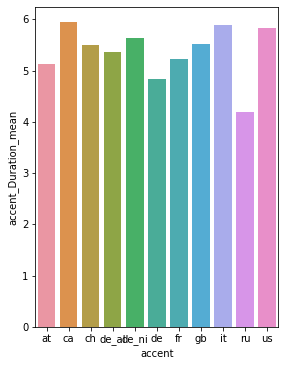

In [33]:
#plt.subplot(2,3,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#plt.legend()

# list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']
# list1=['']
# Accent_=0
# print('#'*60,'Insert Accent Loop','#'*60)
# for j in list_dataset_test_:
#   for i in range(0,11):
#     #print(i)
#     # print(onetime)
#     if j!='stop':
#       #print(f'Accent_{j}={dataset_all_accent_mean.mean_of_all_accent[i]}')
#       print(f"\n print(' Accent_{j}_Duration_mean= ')")
#       print(f"\n print({dataset_all_accent_mean.mean_of_all_accent[i]})")
#       stopcal=i+1
#       j=list_dataset_test_[stopcal]
#   if j=='stop':
#     break
#   print('#'*60,{j},{i},'#'*60)
# To show only the Accent letters ,we add neu column called accent in dataset_accent_all_Duration_mean_result
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']

dataset_accent_all_Duration_mean_result['accent']=dataset_dataset_test_['accent']
import seaborn as sns
from matplotlib import pyplot as plt


################################## Accent AT ###########################################
# position of the figure and figure;s size 
figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
#plt.subplots(figure's number per column,figure's number per row)
ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,1)

# for i in range(len(dataset_accent_all_Duration_mean_result)):
dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')

# plt.xlabel("Speaker's accent - Austria")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_at['accent_Duration_mean'],dataset_test_at['audio_filepath_numeric'], lw=3, ms=20)



ax = sns.barplot(x = 'accent', y = 'accent_Duration_mean', data = dataset_accent_all_Duration_mean_result)
 
# ################################## Accent CA ###########################################  
# ax_duriation_distribution_accent_ca=figure_duriation_distribution_accent.add_subplot(3,4,2)
# plt.xlabel("Speaker's accent - Canada")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ca['audio_filepath_numeric'],dataset_test_ca['duration_numeric'], lw=1, ms=20)

# ################################## Accent CH ###########################################
# ax_duriation_distribution_accent_ch=figure_duriation_distribution_accent.add_subplot(343)
# plt.xlabel("Speaker's accent - China")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ch['audio_filepath_numeric'],dataset_test_ch['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE_AL ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de_al=figure_duriation_distribution_accent.add_subplot(344)
# plt.xlabel("Speaker's accent - Deutsch AL")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de_al['audio_filepath_numeric'],dataset_test_de_al['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE_NI ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de_ni=figure_duriation_distribution_accent.add_subplot(345)
# plt.xlabel("Speaker's accent - Deutsch NI")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de_ni['audio_filepath_numeric'],dataset_test_de_ni['duration_numeric'], lw=1, ms=20)

# ################################## Accent DE ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_de=figure_duriation_distribution_accent.add_subplot(346)
# plt.xlabel("Speaker's accent - Deutsch")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_de['audio_filepath_numeric'],dataset_test_de['duration_numeric'], lw=1, ms=20)

# ################################## Accent FR ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_fr=figure_duriation_distribution_accent.add_subplot(347)
# plt.xlabel("Speaker's accent - France")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_fr['audio_filepath_numeric'],dataset_test_fr['duration_numeric'], lw=1, ms=20)

# ################################## Accent GB ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_gb=figure_duriation_distribution_accent.add_subplot(348)
# plt.xlabel("Speaker's accent - Great Britain")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_gb['audio_filepath_numeric'],dataset_test_gb['duration_numeric'], lw=1, ms=20)

# ################################## Accent IT ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_it=figure_duriation_distribution_accent.add_subplot(349)
# plt.xlabel("Speaker's accent - Italy")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_it['audio_filepath_numeric'],dataset_test_it['duration_numeric'], lw=1, ms=20)

# ################################## Accent RU ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_ru=figure_duriation_distribution_accent.add_subplot(3,4,10)
# plt.xlabel("Speaker's accent - Russian")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_ru['audio_filepath_numeric'],dataset_test_ru['duration_numeric'], lw=1, ms=20)

# ################################## Accent  United States of America ###########################################
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_us=figure_duriation_distribution_accent.add_subplot(3,4,11)
# plt.xlabel("Speaker's accent -  United States of America")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_us['audio_filepath_numeric'],dataset_test_us['duration_numeric'], lw=1, ms=20)

# # #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# # #plt.grid(True)
# plt.show()

# ############## note add the name of the plot ##Duriation Distribution of Audiofiles## to the plots

In [34]:
dataset_test_at

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""was habe ich damals f\u00fcr einen u...","""duration"": 3.6}",3.6,24131267,5.127319
...,...,...,...,...,...,...
4490,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319
4491,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319
4492,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""unter abspaltung von wasser bildet s...","""duration"": 6.8}",6.8,25132532,5.127319
4493,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319


#### Bar Diagrams 2 -Test


In [35]:
# Plot Values Of 2 Columns From Different Datasets 
##################################################
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from compare_df import * # import compare-df Function


dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

# dataset_test_at
# dataset_validated_tsv
#dataset_test_at_validated_tsv=[]
# get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
##>>>>>>dataset_validated_tsv['audio_filepath_numeric']=pd.to_numeric(dataset_validated_tsv['audio_filepath_numeric'])

dataset_validated_tsv


# delete or hide the male and NaN values from displaying at dataset_validated_tsv 
#>>>>>>>dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] == 'male') | (dataset_validated_tsv['gender'].isna())].index, inplace=True)
### or 
# dataset_validated_tsv['path_match']=dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['path_match'].isna())].index, inplace=True)


# dataset_test_at_validated_tsv
# dataset_test_at
# dataset_validated_tsv

#df1['gender_from_df2'] = np.where(df1['path_match_ID']== df2['audio_filepath_numeric'], 'NOOOOO',df2['gender'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,audio_filepath_numeric
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN,17922420
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN,27060918
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN,19728810
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN,19156087
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN,27395829
...,...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911655
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911638
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911641
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911661


In [36]:



dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
dataset_validated_tsv


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,audio_filepath_numeric
3910,f77e2dac7bff2ae7627bcc118909c31ac96d46874b733d...,common_voice_de_20560686.mp3,Seiner eigenen Aussage nach hat er auch die Be...,2,0,teens,female,Österreichisches Deutsch,de,NaN,20560686
3911,f77e2dac7bff2ae7627bcc118909c31ac96d46874b733d...,common_voice_de_20560687.mp3,Es gibt einen gleichnamigen Song von Slade.,2,1,teens,female,Österreichisches Deutsch,de,NaN,20560687
3912,f77e2dac7bff2ae7627bcc118909c31ac96d46874b733d...,common_voice_de_20560691.mp3,Danach setzte allerdings ein rasantes Wachstum...,2,0,teens,female,Österreichisches Deutsch,de,NaN,20560691
4642,132d29051ac70c61b60f7c088dac86804f4e43a8f96b05...,common_voice_de_22188051.mp3,vier,2,0,teens,female,Österreichisches Deutsch,de,Benchmark,22188051
4643,132d29051ac70c61b60f7c088dac86804f4e43a8f96b05...,common_voice_de_22188053.mp3,ja,3,1,teens,female,Österreichisches Deutsch,de,Benchmark,22188053
...,...,...,...,...,...,...,...,...,...,...,...
442004,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905811.mp3,Die Preise schossen in die Höhe.,2,0,fifties,female,Österreichisches Deutsch,de,NaN,21905811
442005,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905812.mp3,Angesichts der im April erzielten Vereinbarung...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,21905812
442006,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905813.mp3,Behandelt werden außerdem die psychologischen ...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,21905813
442007,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905814.mp3,Sport ist populär.,2,0,fifties,female,Österreichisches Deutsch,de,NaN,21905814


In [37]:
#############################************ Merge using audio_filepath_numeric ***********################################################
####################calculate the Mean of duration when the gender is female###########################
dataset_test_at_validated_tsv_female=pd.merge(dataset_test_at,dataset_validated_tsv)
dataset_test_at_validated_tsv_female['gender']=dataset_test_at_validated_tsv_female['gender'].astype("string")
dataset_test_at_validated_tsv_female['accent_Duration_mean_gender']=np.mean(dataset_test_at_validated_tsv_female['duration_numeric'])

dataset_test_at_validated_tsv_female

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,accent_Duration_mean_gender
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319,132ff416e8786bf024b848b75368e410e11716f7669cf5...,common_voice_de_31449916.mp3,Er ist nach Eustache de Saint Pierre der bekan...,4,0,thirties,female,Österreichisches Deutsch,de,NaN,4.892361
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""der erste punkt bezieht sich auf die...","""duration"": 5.2}",5.2,21905399,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905399.mp3,Der erste Punkt bezieht sich auf die Angst vor...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""jede quersubventionierung soll in zu...","""duration"": 10.4}",10.4,21889444,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21889444.mp3,Jede Quersubventionierung soll in Zukunft unzu...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""das ist so weil einige von uns polit...","""duration"": 7.7}",7.7,21905475,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905475.mp3,"Das ist so, weil einige von uns Politikern sic...",2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""block in den probebetrieb""","""duration"": 3.7}",3.7,28058585,5.127319,da4e815e90e826e330c7b82071ea29b4e0f9a7b6fbe6b6...,common_voice_de_28058585.mp3,Block in den Probebetrieb.,2,0,twenties,female,Österreichisches Deutsch,de,NaN,4.892361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wom\u00f6glich ist ein wahlregister ...","""duration"": 3.9}",3.9,21905000,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905000.mp3,Womöglich ist ein Wahlregister die Lösung.,2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
428,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es folgt die aussprache \u00fcber de...","""duration"": 3.1}",3.1,30093050,5.127319,7ec39bb3cb8524d5c37c47ad31a657957eaa6d92cfffa5...,common_voice_de_30093050.mp3,Es folgt die Aussprache über den Bericht.,2,0,twenties,female,Österreichisches Deutsch,de,NaN,4.892361
429,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""das k\u00f6nnte dazu f\u00fchren das...","""duration"": 6.0}",6.0,21891576,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21891576.mp3,"Das könnte dazu führen, dass mit zweierlei Maß...",2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
430,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""dieses thema ist sehr geeignet gro\u...","""duration"": 5.0}",5.0,22295636,5.127319,e7619d9c9e1164d19ba062e6f620c1c21b67b9ccb5b57b...,common_voice_de_22295636.mp3,"Dieses Thema ist sehr geeignet, große Deklarat...",2,0,twenties,female,Österreichisches Deutsch,de,NaN,4.892361


#### Bar Diagram 3 

In [38]:
################**********Male***************#################3
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

# dataset_test_at
# dataset_validated_tsv
#dataset_test_at_validated_tsv=[]
# get the audio file number and display it at dataset_validated_tsv['audio_filepath_numeric']
dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
##>>>>>>dataset_validated_tsv['audio_filepath_numeric']=pd.to_numeric(dataset_validated_tsv['audio_filepath_numeric'])


dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'male') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
dataset_validated_tsv
#############################************ Merge using audio_filepath_numeric ***********################################################
####################calculate the Mean of duration when the gender is female###########################
dataset_test_at_validated_tsv_male=pd.merge(dataset_test_at,dataset_validated_tsv)
dataset_test_at_validated_tsv_male['gender']=dataset_test_at_validated_tsv_male['gender'].astype("string")
dataset_test_at_validated_tsv_male['accent_Duration_mean_gender']=np.mean(dataset_test_at_validated_tsv_male['duration_numeric'])

dataset_test_at_validated_tsv_male


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,accent_Duration_mean_gender
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319,458bc43365f76a2ce7a2e72b5d49a350e376c134f257be...,common_voice_de_19730674.mp3,Eine erste kleinformatige Vorstudie in Bleisti...,2,0,fourties,male,Österreichisches Deutsch,de,NaN,5.089809
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319,458bc43365f76a2ce7a2e72b5d49a350e376c134f257be...,common_voice_de_19703888.mp3,Er blieb ohne Erfolg und lag in ständigem Stre...,2,0,fourties,male,Österreichisches Deutsch,de,NaN,5.089809
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319,e63f4d0cb10fd077c84415041bb941f3ac614dca9ed29f...,common_voice_de_18507972.mp3,Mein Garten ist Teil eines Kleingartenvereins.,2,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""anschlie\u00dfend war er bei der reg...","""duration"": 4.1}",4.1,20143462,5.127319,77789c7d0db30fe94c7825a0e78d2b9c95ece8bb1035f9...,common_voice_de_20143462.mp3,Anschließend war er bei der Regierung in Düsse...,2,0,twenties,male,Österreichisches Deutsch,de,NaN,5.089809
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""silke und marco verkr\u00fcmelten si...","""duration"": 4.7}",4.7,18192538,5.127319,ddcb7c25a023e11244d5042387ef90766b7996cd671f1a...,common_voice_de_18192538.mp3,"Silke und Marco verkrümelten sich unauffällig,...",2,0,fifties,male,Österreichisches Deutsch,de,NaN,5.089809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""weitere stationen dieser reise waren...","""duration"": 5.4}",5.4,23755921,5.127319,876fab646ce5736bb2665cca09133325431aeff17bdd11...,common_voice_de_23755921.mp3,"Weitere Stationen dieser Reise waren Paris, Lo...",2,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809
3460,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""j\u00f6rg m\u00e4der ist ledig""","""duration"": 3.9}",3.9,30676681,5.127319,8ebb1c2feb83c21ec70a61f4d1fc02a9513853c3b64672...,common_voice_de_30676681.mp3,Jörg Mäder ist ledig.,4,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809
3461,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319,68018bfe19c595b492835af7557ce5671e939145bf2e97...,common_voice_de_23706817.mp3,Es handelt sich heute um eine Wohnstraße mit w...,2,0,twenties,male,Österreichisches Deutsch,de,NaN,5.089809
3462,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319,fc72907004214378a78fa5df9671e7e2c721d094116a51...,common_voice_de_23778312.mp3,Die Sammlung wurde von Großherzog Carl Alexand...,2,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809


In [39]:
dataset_test_at_validated_tsv_family=dataset_test_at_validated_tsv_female.append(dataset_test_at_validated_tsv_male)
dataset_test_at_validated_tsv_family

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,accent_Duration_mean_gender
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319,132ff416e8786bf024b848b75368e410e11716f7669cf5...,common_voice_de_31449916.mp3,Er ist nach Eustache de Saint Pierre der bekan...,4,0,thirties,female,Österreichisches Deutsch,de,NaN,4.892361
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""der erste punkt bezieht sich auf die...","""duration"": 5.2}",5.2,21905399,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905399.mp3,Der erste Punkt bezieht sich auf die Angst vor...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""jede quersubventionierung soll in zu...","""duration"": 10.4}",10.4,21889444,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21889444.mp3,Jede Quersubventionierung soll in Zukunft unzu...,2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""das ist so weil einige von uns polit...","""duration"": 7.7}",7.7,21905475,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905475.mp3,"Das ist so, weil einige von uns Politikern sic...",2,0,fifties,female,Österreichisches Deutsch,de,NaN,4.892361
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""block in den probebetrieb""","""duration"": 3.7}",3.7,28058585,5.127319,da4e815e90e826e330c7b82071ea29b4e0f9a7b6fbe6b6...,common_voice_de_28058585.mp3,Block in den Probebetrieb.,2,0,twenties,female,Österreichisches Deutsch,de,NaN,4.892361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""weitere stationen dieser reise waren...","""duration"": 5.4}",5.4,23755921,5.127319,876fab646ce5736bb2665cca09133325431aeff17bdd11...,common_voice_de_23755921.mp3,"Weitere Stationen dieser Reise waren Paris, Lo...",2,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809
3460,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""j\u00f6rg m\u00e4der ist ledig""","""duration"": 3.9}",3.9,30676681,5.127319,8ebb1c2feb83c21ec70a61f4d1fc02a9513853c3b64672...,common_voice_de_30676681.mp3,Jörg Mäder ist ledig.,4,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809
3461,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319,68018bfe19c595b492835af7557ce5671e939145bf2e97...,common_voice_de_23706817.mp3,Es handelt sich heute um eine Wohnstraße mit w...,2,0,twenties,male,Österreichisches Deutsch,de,NaN,5.089809
3462,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319,fc72907004214378a78fa5df9671e7e2c721d094116a51...,common_voice_de_23778312.mp3,Die Sammlung wurde von Großherzog Carl Alexand...,2,0,thirties,male,Österreichisches Deutsch,de,NaN,5.089809


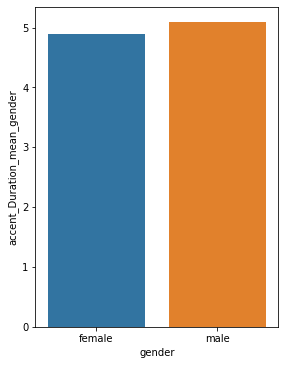

In [40]:
figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
#plt.subplots(figure's number per column,figure's number per row)
ax_duriation_distribution_accent_at=figure_duriation_distribution_accent.add_subplot(3,4,1)

# for i in range(len(dataset_accent_all_Duration_mean_result)):
###>>>>dataset_test_at['accent_Duration_mean'] = np.where(dataset_test_at['audio_filepath']!=np.NaN,5.127319, '000')

# plt.xlabel("Speaker's accent - Austria")
# plt.ylabel("Duriation Distribution of Audiofiles")
# plt.plot(dataset_test_at['accent_Duration_mean'],dataset_test_at['audio_filepath_numeric'], lw=3, ms=20)



ax = sns.barplot(x = 'gender', y = 'accent_Duration_mean_gender', data = dataset_test_at_validated_tsv_family)

#### Bar Diagrams for Accents

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
################**********female***************#################
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
dataset_test_ca['audio_filepath_numeric']=dataset_test_ca['audio_filepath_numeric'].astype('int')
dataset_validated_tsv
# #####
# dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)

# # # ######
# dataset_test_ca_validated_tsv_female=pd.merge(dataset_test_ca,dataset_validated_tsv)
# dataset_test_ca_validated_tsv_female['gender']=dataset_test_ca_validated_tsv_female['gender'].astype("string")
# dataset_test_ca_validated_tsv_female['accent_Duration_mean_gender']=np.mean(dataset_test_ca_validated_tsv_female['duration_numeric'])
# dataset_validated_tsv
# # ################**********Male***************#################
# dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

# dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
# dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
# dataset_validated_tsv

# dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'male') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
# #dataset_validated_tsv
# #############################************ Merge using audio_filepath_numeric ***********################################################
# ####################calculate the Mean of duration when the gender is female###########################
# dataset_test_ca_validated_tsv_male=pd.merge(dataset_test_ca,dataset_validated_tsv)
# dataset_test_ca_validated_tsv_male['gender']=dataset_test_ca_validated_tsv_male['gender'].astype("string")
# dataset_test_ca_validated_tsv_male['accent_Duration_mean_gender']=np.mean(dataset_test_ca_validated_tsv_male['duration_numeric'])
# print('*******************************************')

# dataset_test_ca_validated_tsv_family=dataset_test_ca_validated_tsv_female.append(dataset_test_ca_validated_tsv_male)
# dataset_test_ca_validated_tsv_family
# figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
# #plt.subplots(figure's number per column,figure's number per row)
# ax_duriation_distribution_accent_ca=figure_duriation_distribution_accent.add_subplot(3,4,1)

# # for i in range(len(dataset_accent_all_Duration_mean_result)):
# ###>>>>dataset_test_ca['accent_Duration_mean'] = np.where(dataset_test_ca['audio_filepath']!=np.NaN,5.127319, '000')

# # plt.xlabel("Speaker's accent - Austria")
# # plt.ylabel("Duriation Distribution of Audiofiles")
# # plt.plot(dataset_test_ca['accent_Duration_mean'],dataset_test_ca['audio_filepath_numeric'], lw=3, ms=20)



# ax = sns.barplot(x = 'gender', y = 'accent_Duration_mean_gender', data = dataset_test_ca_validated_tsv_family)



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,audio_filepath_numeric
0,0052c07533a6976233ad5926d950b523002c4d8cdd9ae8...,common_voice_de_17922420.mp3,Zieht euch bitte draußen die Schuhe aus.,2,0,NaN,NaN,NaN,de,NaN,17922420
1,00aa59ff387a07bf1c056cccd6715b3c764201f51092c3...,common_voice_de_27060918.mp3,Es gibt auch mehrere Campingplätze.,2,0,NaN,NaN,NaN,de,NaN,27060918
2,02274179aeff73e1e7897ed6fec2355af2cd6e5410e3c6...,common_voice_de_19728810.mp3,Es kommt zum Showdown in Gstaad.,2,1,NaN,NaN,NaN,de,NaN,19728810
3,02650022b4a4266846057d97ae4d81da8af9e09e2a4bb1...,common_voice_de_19156087.mp3,Ihre Fotostrecken erschienen in Modemagazinen ...,3,1,NaN,NaN,NaN,de,NaN,19156087
4,02786062ec85038ffeed4c38ed7b31d3aa8e6439817fb1...,common_voice_de_27395829.mp3,"Aber weißt du, wer den Stein wirklich ins Roll...",2,0,NaN,NaN,NaN,de,NaN,27395829
...,...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911655
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911638
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911641
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911661


In [57]:
dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] == 'other') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())].index, inplace=True)

dataset_validated_tsv

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment,audio_filepath_numeric
6,03ac3eb87717f430b8a64228e61b5829cf6187f790c0fd...,common_voice_de_18520278.mp3,"Was solls, ich bin bereit.",2,1,thirties,male,Russisch Deutsch,de,NaN,18520278
26,0df96a055c391517acf584f64f74df3e5356de0c14a6c8...,common_voice_de_26888041.mp3,"Wenn nicht, dann legt man sie irgendwo hin, wo...",4,0,twenties,female,Russisch Deutsch,de,NaN,26888041
45,1aabab5972b13f76cd0ae98088be9d79c3bfbb30fd60a3...,common_voice_de_19756404.mp3,"Sie liegt im Osten des Landes, an der Grenze z...",2,0,thirties,male,Schweizerdeutsch,de,NaN,19756404
51,1e44e03d919c81cb3b1e8a1c5d494e864607631e690d83...,common_voice_de_18205461.mp3,"Meine Lieblingsfarbe ist schwarz, sagte Lola.",2,0,seventies,male,Deutschland Deutsch,de,NaN,18205461
64,262c42bd13a2bd373050ee8e4bab9e842e598793fa9a5a...,common_voice_de_32367831.mp3,Ganzjährig wehen starke Winde.,4,0,thirties,male,Französisch Deutsch,de,NaN,32367831
...,...,...,...,...,...,...,...,...,...,...,...
793063,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911655.mp3,Gegen Bezahlung posierte sie für Fotos und gab...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911655
793064,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911638.mp3,Zur Folgesaison wechselte er fest in die Niede...,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911638
793065,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911641.mp3,Er ist auf die Stile Schmetterling und Lagen s...,3,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911641
793066,372293e65cdab88771e028a4351651ab2eff64438ddafc...,common_voice_de_32911661.mp3,Vieles wurde exportiert.,6,0,fifties,male,"Nordrhein-Westfalen,Bundesdeutsch, Hochdeutsch...",de,NaN,32911661


In [60]:
dataset_test_at_validated_tsv_female=pd.merge(dataset_test_at,dataset_validated_tsv)
dataset_test_at_validated_tsv_female

,audio_filepath,text,duration,duration_numeric,audio_filepath_numeric,accent_Duration_mean,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er ist nach eustache de saint pierre...","""duration"": 4.9}",4.9,31449916,5.127319,132ff416e8786bf024b848b75368e410e11716f7669cf5...,common_voice_de_31449916.mp3,Er ist nach Eustache de Saint Pierre der bekan...,4,0,thirties,female,Österreichisches Deutsch,de,NaN
1,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""eine erste kleinformatige vorstudie ...","""duration"": 10.1}",10.1,19730674,5.127319,458bc43365f76a2ce7a2e72b5d49a350e376c134f257be...,common_voice_de_19730674.mp3,Eine erste kleinformatige Vorstudie in Bleisti...,2,0,fourties,male,Österreichisches Deutsch,de,NaN
2,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""er blieb ohne erfolg und lag in st\u...","""duration"": 9.0}",9.0,19703888,5.127319,458bc43365f76a2ce7a2e72b5d49a350e376c134f257be...,common_voice_de_19703888.mp3,Er blieb ohne Erfolg und lag in ständigem Stre...,2,0,fourties,male,Österreichisches Deutsch,de,NaN
3,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""mein garten ist teil eines kleingart...","""duration"": 3.7}",3.7,18507972,5.127319,e63f4d0cb10fd077c84415041bb941f3ac614dca9ed29f...,common_voice_de_18507972.mp3,Mein Garten ist Teil eines Kleingartenvereins.,2,0,thirties,male,Österreichisches Deutsch,de,NaN
4,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""der erste punkt bezieht sich auf die...","""duration"": 5.2}",5.2,21905399,5.127319,41e3d72db47c0bd8c5a5cde0bf293316910918bf6d4cf3...,common_voice_de_21905399.mp3,Der erste Punkt bezieht sich auf die Angst vor...,2,0,fifties,female,Österreichisches Deutsch,de,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""j\u00f6rg m\u00e4der ist ledig""","""duration"": 3.9}",3.9,30676681,5.127319,8ebb1c2feb83c21ec70a61f4d1fc02a9513853c3b64672...,common_voice_de_30676681.mp3,Jörg Mäder ist ledig.,4,0,thirties,male,Österreichisches Deutsch,de,NaN
3892,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""es handelt sich heute um eine wohnst...","""duration"": 5.8}",5.8,23706817,5.127319,68018bfe19c595b492835af7557ce5671e939145bf2e97...,common_voice_de_23706817.mp3,Es handelt sich heute um eine Wohnstraße mit w...,2,0,twenties,male,Österreichisches Deutsch,de,NaN
3893,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""wir m\u00fcssen sie blo\u00df verbes...","""duration"": 4.2}",4.2,21599214,5.127319,ccf769a75346cf999921bf2d74482ecf12d588644106b5...,common_voice_de_21599214.mp3,Wir müssen sie bloß verbessern und wir müssen ...,2,0,twenties,female,Österreichisches Deutsch,de,NaN
3894,"{""audio_filepath"": ""/ds/audio/CommonVoiceCorpu...","""text"": ""die sammlung wurde von gro\u00dfherz...","""duration"": 5.6}",5.6,23778312,5.127319,fc72907004214378a78fa5df9671e7e2c721d094116a51...,common_voice_de_23778312.mp3,Die Sammlung wurde von Großherzog Carl Alexand...,2,0,thirties,male,Österreichisches Deutsch,de,NaN


In [61]:
dataset_validated_tsv_aaa=dataset_test_at_validated_tsv_female.groupby(['gender','accents'])
dataset_validated_tsv_aaa

In [62]:
dataset_validated_tsv_aaa.agg('mean')

,,duration_numeric,audio_filepath_numeric,up_votes,down_votes
gender,accents,,,,
female,Österreichisches Deutsch,4.892361,2.184768e+07,2.134259,0.081019
male,Österreichisches Deutsch,5.089809,2.201364e+07,2.133372,0.090069


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
list_dataset_test_=['at','ca','ch','de_al','de_ni','de','fr','gb','it','ru','us','stop']


for accentletter in range(len(list_dataset_test_)):
  ################**********female***************#################
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
  #####
  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
  ######
  dataset_test_{accentletter}_validated_tsv_female=pd.merge(dataset_test_{accentletter},dataset_validated_tsv)
  dataset_test_{accentletter}_validated_tsv_female['gender']=dataset_test_{accentletter}_validated_tsv_female['gender'].astype("string")
  dataset_test_{accentletter}_validated_tsv_female['accent_Duration_mean_gender']=np.mean(dataset_test_{accentletter}_validated_tsv_female['duration_numeric'])

  ################**********Male***************#################
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')


  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'male') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
  #dataset_validated_tsv
  #############################************ Merge using audio_filepath_numeric ***********################################################
  ####################calculate the Mean of duration when the gender is female###########################
  dataset_test_{accentletter}_validated_tsv_male=pd.merge(dataset_test_{accentletter},dataset_validated_tsv)
  dataset_test_{accentletter}_validated_tsv_male['gender']=dataset_test_{accentletter}_validated_tsv_male['gender'].astype("string")
  dataset_test_{accentletter}_validated_tsv_male['accent_Duration_mean_gender']=np.mean(dataset_test_{accentletter}_validated_tsv_male['duration_numeric'])

  dataset_test_{accentletter}_validated_tsv_family=dataset_test_{accentletter}_validated_tsv_female.append(dataset_test_{accentletter}_validated_tsv_male)

  figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
  #plt.subplots(figure's number per column,figure's number per row)
  ax_duriation_distribution_accent_{accentletter}=figure_duriation_distribution_accent.add_subplot(3,4,1)

  # for i in range(len(dataset_accent_all_Duration_mean_result)):
  ###>>>>dataset_test_{accentletter}['accent_Duration_mean'] = np.where(dataset_test_{accentletter}['audio_filepath']!=np.NaN,5.127319, '000')

  # plt.xlabel("Speaker's accent - Austria")
  # plt.ylabel("Duriation Distribution of Audiofiles")
  # plt.plot(dataset_test_{accentletter}['accent_Duration_mean'],dataset_test_{accentletter}['audio_filepath_numeric'], lw=3, ms=20)



  ax = sns.barplot(x = 'gender', y = 'accent_Duration_mean_gender', data = dataset_test_{accentletter}_validated_tsv_family)
  accentgenderplot=ax


SyntaxError: ignored

In [ ]:
def plotBarDiagramsAccentGender(accentletter):

  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt
  ################**********female***************#################
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')
 #####
  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'female') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
 ######
  dataset_test_accentletter_validated_tsv_female=pd.merge(dataset_test_accentletter,dataset_validated_tsv)
  dataset_test_accentletter_validated_tsv_female['gender']=dataset_test_accentletter_validated_tsv_female['gender'].astype("string")
  dataset_test_accentletter_validated_tsv_female['accent_Duration_mean_gender']=np.mean(dataset_test_accentletter_validated_tsv_female['duration_numeric'])

  ################**********Male***************#################
  dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

  dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
  dataset_validated_tsv['audio_filepath_numeric']=dataset_validated_tsv['audio_filepath_numeric'].astype('int')


  dataset_validated_tsv.drop(dataset_validated_tsv[(dataset_validated_tsv['gender'] != 'male') | (dataset_validated_tsv['gender'].isna())| (dataset_validated_tsv['accents'].isna())| (dataset_validated_tsv['accents']!='Österreichisches Deutsch')].index, inplace=True)
  #dataset_validated_tsv
  #############################************ Merge using audio_filepath_numeric ***********################################################
  ####################calculate the Mean of duration when the gender is female###########################
  dataset_test_accentletter_validated_tsv_male=pd.merge(dataset_test_accentletter,dataset_validated_tsv)
  dataset_test_accentletter_validated_tsv_male['gender']=dataset_test_accentletter_validated_tsv_male['gender'].astype("string")
  dataset_test_accentletter_validated_tsv_male['accent_Duration_mean_gender']=np.mean(dataset_test_accentletter_validated_tsv_male['duration_numeric'])

  dataset_test_accentletter_validated_tsv_family=dataset_test_accentletter_validated_tsv_female.append(dataset_test_accentletter_validated_tsv_male)
  
  figure_duriation_distribution_accent=plt.figure(12,figsize=(20,20))  
  #plt.subplots(figure's number per column,figure's number per row)
  ax_duriation_distribution_accent_accentletter=figure_duriation_distribution_accent.add_subplot(3,4,1)

  # for i in range(len(dataset_accent_all_Duration_mean_result)):
  ###>>>>dataset_test_accentletter['accent_Duration_mean'] = np.where(dataset_test_accentletter['audio_filepath']!=np.NaN,5.127319, '000')

  # plt.xlabel("Speaker's accent - Austria")
  # plt.ylabel("Duriation Distribution of Audiofiles")
  # plt.plot(dataset_test_accentletter['accent_Duration_mean'],dataset_test_accentletter['audio_filepath_numeric'], lw=3, ms=20)



  ax = sns.barplot(x = 'gender', y = 'accent_Duration_mean_gender', data = dataset_test_accentletter_validated_tsv_family)
  accentgenderplot=ax
  return accentgenderplot

In [ ]:
! cp /content/drive/MyDrive/QU-DFKI-Thesis-ASR/Experimentation/plotBarDiagramsAccentGender_script.py   /content/plotBarDiagramsAccentGender_script.py
# implement the script
exec(open("plotBarDiagramsAccentGender_script.py").read())

#### **Duration distribution of audiofiles per speaker's gender. both as a plot and in terms of mean and variance.**

In [ ]:
################################## Gender ###########################################
print('################################## Gender ###########################################')
 # Duration distribution of audiofiles per speaker's gender

import re # import the library of research about special value in String 

# add Columns Names to the Dataset: header=None, names=['audio_filepath','text','duration']
dataset_test_at = pd.read_csv('test_at.txt', header=None, names=['audio_filepath','text','duration'])
dataset_validated_tsv = pd.read_csv('validated.tsv', sep='\t')

# extract the numeric values of the durations from the third Column and store it in a new column called duration(numeric)
dataset_test_at['duration(numeric)'] = dataset_test_at['duration'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
dataset_test_at['duration(numeric)'] =dataset_test_at['duration(numeric)'].div(10)


# extract the audio files number's values from the second Column and store it in a new column called duration_numeric
dataset_validated_tsv['audio_filepath_numeric'] = dataset_validated_tsv['path'].str[-12:-4]
dataset_test_at['audio_filepath_numeric'] = dataset_test_at['audio_filepath'].str[-13:-5]


#Comparing two dataframes and getting the simpliers [equal Audiofiles Number from both datasets]
#dataset_test_at['path_numeric'] = dataset_validated_tsv['audio_filepath_numeric'] #add the path_numeric column from dataset_validated_tsv to dataset_test_at
print('*********************print Contents of dataset_test_at.info()**********************')

print(dataset_test_at.info())
print('*********************print Contents of dataset_test_at**********************')

print(dataset_test_at)
print('*********************print Contents of dataset_validated_tsv.info()**********************')

print(dataset_validated_tsv.info())
print('*********************print Contents of dataset_test_at**********************')

print(dataset_validated_tsv)
print('****************************************************************************')

##############################################################################
#create a new column in dataset_test_at to show the result of matching the path
# dataset_test_at['path_match'] = np.where(dataset_test_at['audio_filepath_numeric'] == dataset_validated_tsv['audio_filepath_numeric'], 'True', 'False') 
print('*********************print Contents of dataset_test_at.info()**********************')

print(dataset_test_at.info())
print('*********************print Contents of path_match**********************')

print(dataset_test_at)


#dataset_test_at['path_match']=dataset_test_at.drop(dataset_test_at[(dataset_test_at['path_match'].isna())].index, inplace=True)

print('*********************print Contents of gender_match**********************')

 #create a new column in dataset_test_at for path diff
dataset_test_at['gender_match'] = np.where(dataset_test_at['audio_filepath_numeric'] == dataset_validated_tsv['audio_filepath_numeric'], dataset_validated_tsv['gender'], np.nan) 
print(dataset_test_at)
print('*********************print Contents of gender_from_dataset_validated_tsv**********************')


###dataset_test_at['gender_from_dataset_validated_tsv'] = np.where(dataset_test_at['gender_match'].isna(),, dataset_test_at['gender_match']) #create a new column in dataset_test_at for path diff
###dataset_test_at['gender_from_dataset_validated_tsv']=dataset_test_at.drop(dataset_test_at[(dataset_test_at['gender_match'].isna())].index, inplace=True)

# # delete gender NaN Values from the result

# # delete duration NaN Values from the result
 
# Hide NaN values from the displayed result
print('*********************print Contents of gender_from_dataset_validated_tsv**********************')
dataset_test_at.drop(dataset_test_at[(dataset_test_at['gender_match'].isna())].index, inplace=True)
dataset_test_at['gender_from_dataset_validated_tsv']=dataset_test_at['gender_match']
 #create a new column in dataset_test_at for path diff
print(dataset_test_at)
#print(dataset_test_at[dataset_test_at["path_match_ID"].map(lambda path_match: "True" in path_match)])

plt.xlabel("Gender")
plt.ylabel("duration_numeric")
plt.plot(dataset_test_at['gender_match'],dataset_test_at['duration_numeric'], lw=1, ms=20)

# #kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
# #plt.grid(True)
plt.show()

In [ ]:
#plt.subplot(2,3,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#plt.legend()


# position of the figure and figure;s size 
plt.figure(1,(10,15))  

#plt.subplots(figure's number per column,figure's number per row)
# plt.subplots(3,4)

plt.xlabel("Speaker's accent - Austria")
plt.ylabel("Duriation Distribution of Audiofiles")
plt.plot(dataset_test_at['audio_filepath_numeric'],dataset_test_at['duration_numeric'], lw=1, ms=20)

#kurvenname = ['blau', 'orange', 'grün', 'rot', 'lila']
plt.grid(True)
plt.show()

## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 



HelloWorld

pytorch/android-demo-app

#### 1. Model Preparation


In [ ]:
 !pip install torch torchvision
 

To serialize and optimize the model for Android, you can use the Python script in the root folder of HelloWorld app:



In [ ]:
import shutil

shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app', ignore_errors=True)
shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch', ignore_errors=True)

  # import os
 # os.rmdir('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets')

In [ ]:

import torch
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile
import os

model = torchvision.models.mobilenet_v3_small(pretrained=True)
model.eval()
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model, example)
optimized_traced_model = optimize_for_mobile(traced_script_module)

os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets')
optimized_traced_model._save_for_lite_interpreter("/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Emformer-training/app/src/main/assets/model.pt")

If everything works well, we should have our scripted and optimized model - model.pt generated in the assets folder of android application. That will be packaged inside android application as asset and can be used on the device.

By using the new MobileNet v3 model instead of the old Resnet18 model, and by calling the optimize_for_mobile method on the traced model, the model inference time on a Pixel 3 gets decreased from over 230ms to about 40ms.

More details about TorchScript you can find in tutorials on pytorch.org

 #### 2. Cloning from github

In [ ]:
# os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch') 
!git clone https://github.com/pytorch/android-demo-app.git
! https://gitlab.com/voize-gmbh/machine-learning/speech.git

In [ ]:
!cd /content/android-demo-app/HelloWorldApp

In [ ]:
!ls
!./gradlew installDebug

In [ ]:
 os.makedirs('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch') 

In [ ]:
shutil.rmtree('/content/drive/MyDrive/QU-DFKI-Thesis-ASR/Pytroch', ignore_errors=True)


## <font color="1497d4">  **Running a Basic Emformer Training**</font>

 


## <font color="1497d4">  **Accented Speech Recognition - Speech Repo**</font>

<font color=white> **speech recognition @ voize**</font> 

## <font color="1497d4">  **Development Workflow**</font>
 
<font color=white> **Setup dev environment:**</font> 


 

##Training efficiency

Measured on common-voice-de 6.1 (based on commit bff9e3f9afcb3893451f4d52ecf811f32c8ff59d):



Measured on common-voice-de 6.1 concatenated with multilingual-librispeech-de (some data dropped):



 ## Statistical Analysis for Accented Speech recognition
 ## Mozilla Common Voice 10.0. dataset download 
 

